# The Network of Correlations Among Common Noun Phrases in a Collection of Books

# The Case of Jane Austen, Charlotte Bronte, Anne Bronte and Charles Dickens

## By Moses Boudourides & Sergios Lenis 

### Importing Python Modules 

In [1]:
import random
import nltk
import codecs
from textblob import TextBlob
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import imp
from ipywidgets import widgets
import tools as tool
import warnings
warnings.filterwarnings('ignore')
# utilsdir='/home/sergios-len/Dropbox/Python Projects (1)/utils/'#tools.py'
# utilsdir='/home/mosesboudourides/Dropbox/Python Projects/utils'

%matplotlib inline 
%load_ext autoreload

## I. Importing the Texts of Books

In [2]:
# filenames=['/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/Austen_Emma.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/Austen_Pride.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/Austen_Sense.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/CBronte_Jane.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/CBronte_Professor.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/CBronte_Villette.txt',
#            '/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/british-fiction-corpus/Dickens_Bleak.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/british-fiction-corpus/Dickens_David.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/british-fiction-corpus/Dickens_Hard.txt']
filenames=['VarLiteratureBooksCorpora/austen-brontë/Austen_Emma.txt',
           'VarLiteratureBooksCorpora/austen-brontë/Austen_Pride.txt',
           'VarLiteratureBooksCorpora/austen-brontë/Austen_Sense.txt',
           'VarLiteratureBooksCorpora/austen-brontë/CBronte_Jane.txt',
           'VarLiteratureBooksCorpora/austen-brontë/CBronte_Professor.txt',
           'VarLiteratureBooksCorpora/austen-brontë/CBronte_Villette.txt',
           'VarLiteratureBooksCorpora/british-fiction-corpus/ABronte_Agnes.txt',
           'VarLiteratureBooksCorpora/british-fiction-corpus/ABronte_Tenant.txt',#]
          'VarLiteratureBooksCorpora/british-fiction-corpus/Dickens_Oliver_Twist.txt',
           'VarLiteratureBooksCorpora/british-fiction-corpus/Dickens_David.txt',
           'VarLiteratureBooksCorpora/british-fiction-corpus/Dickens_Hard.txt']

# filenames = ['/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/Austen_Emma.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/Austen_Pride.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/Austen_Sense.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/CBronte_Jane.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/CBronte_Professor.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/CBronte_Villette.txt']
# titlename = "Plato's Protagoras"
# titlenames=['Austen_Emma','Austen_Pride','Austen_Sense','CBronte_Jane','CBronte_Professor','CBronte_Villette']
titlenames=['Austen_Emma',
            'Austen_Pride_and_Prejudice',
            'Austen_Sense_and_Sensibility',
            'CBronte_Jane_Eyre',
            'CBronte_The_Professor',
            'CBronte_Villette',
           'ABronte_Agnes_Grey',
           'ABronte_The_Tenant_of_Wildfell_Hall',#]
            'Dickens_Oliver_Twist',
            'Dickens_David_Copperfield',
            'Dickens_Hard_Times']
# e']
# filenames=['VarLiteratureBooksCorpora/austen-brontë/Austen_Emma.txt','VarLiteratureBooksCorpora/austen-brontë/Austen_Pride.txt','VarLiteratureBooksCorpora/austen-brontë/Austen_Sense.txt','VarLiteratureBooksCorpora/austen-brontë/CBronte_Jane.txt','VarLiteratureBooksCorpora/austen-brontë/CBronte_Professor.txt','VarLiteratureBooksCorpora/austen-brontë/CBronte_Villette.txt']
# from textblob.np_extractors import ConllExtractor
# extractor = ConllExtractor()
        

# titlenames=['Austen_Emma','Austen_Pride','Austen_Sense','CBronte_Jane','CBronte_Professor','CBronte_Villette']
blobs={}
for ii,filename in enumerate(filenames):
    f = codecs.open(filename, "r", encoding="utf-8").readlines()

    num_lines = 0
    num_words = 0
    num_chars = 0
    for line in f:
        words = line.split()
        num_lines += 1
        num_words += len(words)
        num_chars += len(line)
    print "%s has number of words = %i (and number of characters/symbols = %i)" %(titlenames[ii],num_words,num_chars)
    blobs[ii] = TextBlob("\n".join(f))
#     blobs[ii] = TextBlob(f,np_extractor=extractor)

Austen_Emma has number of words = 157836 (and number of characters/symbols = 894304)
Austen_Pride_and_Prejudice has number of words = 121472 (and number of characters/symbols = 683754)
Austen_Sense_and_Sensibility has number of words = 118573 (and number of characters/symbols = 678691)
CBronte_Jane_Eyre has number of words = 189029 (and number of characters/symbols = 1026320)
CBronte_The_Professor has number of words = 87983 (and number of characters/symbols = 506144)
CBronte_Villette has number of words = 192124 (and number of characters/symbols = 1104704)
ABronte_Agnes_Grey has number of words = 67755 (and number of characters/symbols = 378987)
ABronte_The_Tenant_of_Wildfell_Hall has number of words = 169364 (and number of characters/symbols = 930593)
Dickens_Oliver_Twist has number of words = 157981 (and number of characters/symbols = 897635)
Dickens_David_Copperfield has number of words = 359374 (and number of characters/symbols = 1960784)
Dickens_Hard_Times has number of words = 1

## II. Extracting the Most Frequent Noun Phrases in the Collection of Books

In [3]:
moccurdic={}
for ii,blob in blobs.items():
    all_sents=blob.sentences
    occurdic=Counter()
    for sen in all_sents:
        dd=sen.dict
        for np in dd['noun_phrases']:
            occurdic[np]+=1

#     df = pd.DataFrame(columns=["%s Noun Phrases" %titlenames[ii], "Frequencies"])
#     u=1
#     for l,v in occurdic.items(): 
#         df.loc[u]=[l,v]
#         u+=1

#     print "The total number of noun phrases in %s is %i." %(titlenames[ii],len(df))#len(npA))
#     df.sort(["Frequencies"], ascending=[0])

#     cut = 2
#     df = df[df['Frequencies']>cut].sort(["Frequencies"], ascending=[0])
#     print "The total number of noun phrases in %s with frequencies > %i is %i." %(titlenames[ii],cut,len(df))#len(npA))
#     df.sort(["Frequencies"], ascending=[0])
    moccurdic[ii]=Counter(occurdic)

In [4]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
ses=None
for ii,vv in moccurdic.items():
#     print ii,set(vv).intersection(stop).intersection(ses)
    if ses==None:
        
        ses=set(vv.keys())-stop
    else:
        ses=ses.intersection(set(vv.keys())-stop)
print 'The %i books have the following %i common noun phrases:' %(len(titlenames),len(ses))
columnss=['noun_phrase']
for tit in list(titlenames):
    columnss.append(tit)

dfnamesa=pd.DataFrame()
dff=[]
for sss in ses:
    
    dfd={'noun_phrase':sss}
    for ii,vv in moccurdic.items():
        dfd[titlenames[ii]]=vv[sss]
    dff.append(dfd)
dfnamesa=pd.DataFrame(dff)
# ses
dfnamesa=dfnamesa[columnss]
dfnamesa


The 11 books have the following 21 common noun phrases:


,noun_phrase,Austen_Emma,Austen_Pride_and_Prejudice,Austen_Sense_and_Sensibility,CBronte_Jane_Eyre,CBronte_The_Professor,CBronte_Villette,ABronte_Agnes_Grey,ABronte_The_Tenant_of_Wildfell_Hall,Dickens_Oliver_Twist,Dickens_David_Copperfield,Dickens_Hard_Times
0,long time,1,3,1,12,6,2,7,5,15,52,6
1,well,84,36,48,92,33,52,10,28,8,32,13
2,think,3,1,1,3,1,3,2,4,3,7,4
3,england,10,5,8,37,40,25,2,4,3,25,4
4,shall,4,4,5,14,1,16,1,1,2,6,3
5,whether,2,1,1,4,1,8,4,4,6,19,5
6,god,7,3,9,106,27,59,41,74,30,44,10
7,never,11,6,5,16,2,17,6,5,7,9,10
8,own way,7,4,3,4,2,12,4,6,2,9,1
9,own heart,7,1,7,2,4,2,2,7,1,8,1


In [5]:
ses=None
# excluded=['have','was','shall',"ca n't",'think']
excluded=['shall',"ca n't",'think']
for ii,vv in moccurdic.items():
    vv=set(vv.keys()) -(set(excluded))
    if ses==None:
        ses=set(vv)
    else:
        ses=ses.intersection(set(vv))
#     print ii,len(ses)
print 'The %i books have the following %i common noun phrases:' %(len(titlenames),len(ses))
columnss=['noun_phrase']
for tit in list(titlenames):
    columnss.append(tit)

dfnames=pd.DataFrame()
dff=[]
for sss in ses:
    
    dfd={'noun_phrase':sss}
#     dff.append({})
#     print sss,
    for ii,vv in moccurdic.items():
        dfd[titlenames[ii]]=vv[sss]*1./sum(moccurdic[ii].values())
    dff.append(dfd)
#         print ii,'=>',vv[sss],
#     print 
# print dff
dfnames=pd.DataFrame(dff)
# ses
# print dfnames.columns
dfnames=dfnames[columnss]
dfnames

The 11 books have the following 23 common noun phrases:


,noun_phrase,Austen_Emma,Austen_Pride_and_Prejudice,Austen_Sense_and_Sensibility,CBronte_Jane_Eyre,CBronte_The_Professor,CBronte_Villette,ABronte_Agnes_Grey,ABronte_The_Tenant_of_Wildfell_Hall,Dickens_Oliver_Twist,Dickens_David_Copperfield,Dickens_Hard_Times
0,england,0.000905,0.000641,0.000999,0.003207,0.006785,0.001885,0.000528,0.000479,0.000243,0.001053,0.000512
1,london,0.004074,0.006920,0.004372,0.001734,0.001527,0.000980,0.002375,0.003950,0.003562,0.003960,0.001025
2,have,0.001630,0.001410,0.001499,0.002427,0.001018,0.001131,0.000792,0.001317,0.000405,0.000842,0.000769
3,your,0.002354,0.005510,0.004622,0.003034,0.002036,0.001809,0.000264,0.000479,0.000405,0.000716,0.000640
4,long time,0.000091,0.000384,0.000125,0.001040,0.001018,0.000151,0.001847,0.000598,0.001214,0.002190,0.000769
5,will,0.000905,0.001025,0.001124,0.002774,0.001866,0.001583,0.001847,0.001676,0.000405,0.001053,0.001153
6,god,0.000634,0.000384,0.001124,0.009188,0.004580,0.004448,0.010818,0.008857,0.002428,0.001853,0.001281
7,own heart,0.000634,0.000128,0.000874,0.000173,0.000679,0.000151,0.000528,0.000838,0.000081,0.000337,0.000128
8,mr.,0.003440,0.002563,0.000999,0.001734,0.000339,0.002714,0.001583,0.000479,0.000486,0.003159,0.000512
9,'s eyes,0.000453,0.000641,0.000500,0.000173,0.000339,0.000151,0.000264,0.000120,0.000324,0.000295,0.000384


In [6]:
dfnamescor=dfnames.corr()
dfnamescor

,Austen_Emma,Austen_Pride_and_Prejudice,Austen_Sense_and_Sensibility,CBronte_Jane_Eyre,CBronte_The_Professor,CBronte_Villette,ABronte_Agnes_Grey,ABronte_The_Tenant_of_Wildfell_Hall,Dickens_Oliver_Twist,Dickens_David_Copperfield,Dickens_Hard_Times
Austen_Emma,1.000000,0.891105,0.877263,0.633283,0.420923,0.593008,0.068744,0.324853,0.334287,0.707310,0.474138
Austen_Pride_and_Prejudice,0.891105,1.000000,0.938034,0.531760,0.353298,0.483180,0.062877,0.282876,0.367364,0.692608,0.363788
Austen_Sense_and_Sensibility,0.877263,0.938034,1.000000,0.677887,0.523547,0.621730,0.111456,0.347251,0.270076,0.555212,0.365642
CBronte_Jane_Eyre,0.633283,0.531760,0.677887,1.000000,0.787181,0.896941,0.589156,0.739124,0.203903,0.440595,0.469786
CBronte_The_Professor,0.420923,0.353298,0.523547,0.787181,1.000000,0.647328,0.359763,0.513353,0.023663,0.296952,0.297749
CBronte_Villette,0.593008,0.483180,0.621730,0.896941,0.647328,1.000000,0.476726,0.571602,0.201637,0.390590,0.338196
ABronte_Agnes_Grey,0.068744,0.062877,0.111456,0.589156,0.359763,0.476726,1.000000,0.802891,0.272712,0.193427,0.204886
ABronte_The_Tenant_of_Wildfell_Hall,0.324853,0.282876,0.347251,0.739124,0.513353,0.571602,0.802891,1.000000,0.352933,0.500023,0.511223
Dickens_Oliver_Twist,0.334287,0.367364,0.270076,0.203903,0.023663,0.201637,0.272712,0.352933,1.000000,0.402947,0.395247
Dickens_David_Copperfield,0.707310,0.692608,0.555212,0.440595,0.296952,0.390590,0.193427,0.500023,0.402947,1.000000,0.486862


In [7]:
G=nx.Graph()
ddd=dfnamescor.to_dict(orient='index')
# print ddd
for k,v in ddd.items():
    for kk,vv in v.items():
        G.add_edge(k,kk,weight=vv)
import community as comms
part = comms.best_partition(G)
# print part
npart={}
for k,v in part.items():
    if v not in npart:
        npart[v]=[]
    npart[v].append(k)
npart
# for row in dfnamescor.iterrows():
#     index, data = row
#     print index,data

{0: ['Austen_Pride_and_Prejudice',
  'Austen_Sense_and_Sensibility',
  'Austen_Emma'],
 1: ['Dickens_David_Copperfield'],
 2: ['Dickens_Oliver_Twist', 'Dickens_Hard_Times'],
 3: ['CBronte_Villette', 'CBronte_Jane_Eyre', 'CBronte_The_Professor'],
 4: ['ABronte_Agnes_Grey', 'ABronte_The_Tenant_of_Wildfell_Hall']}

Number of communities of Network of Common Noun Phrases  = 5
Community partition of Network of Common Noun Phrases :
[['Austen_Pride_and_Prejudice', 'Austen_Sense_and_Sensibility', 'Austen_Emma'], ['Dickens_David_Copperfield'], ['Dickens_Oliver_Twist', 'Dickens_Hard_Times'], ['CBronte_Villette', 'CBronte_Jane_Eyre', 'CBronte_The_Professor'], ['ABronte_Agnes_Grey', 'ABronte_The_Tenant_of_Wildfell_Hall']]
Community modularity of Network of Common Noun Phrases  = 0.2415


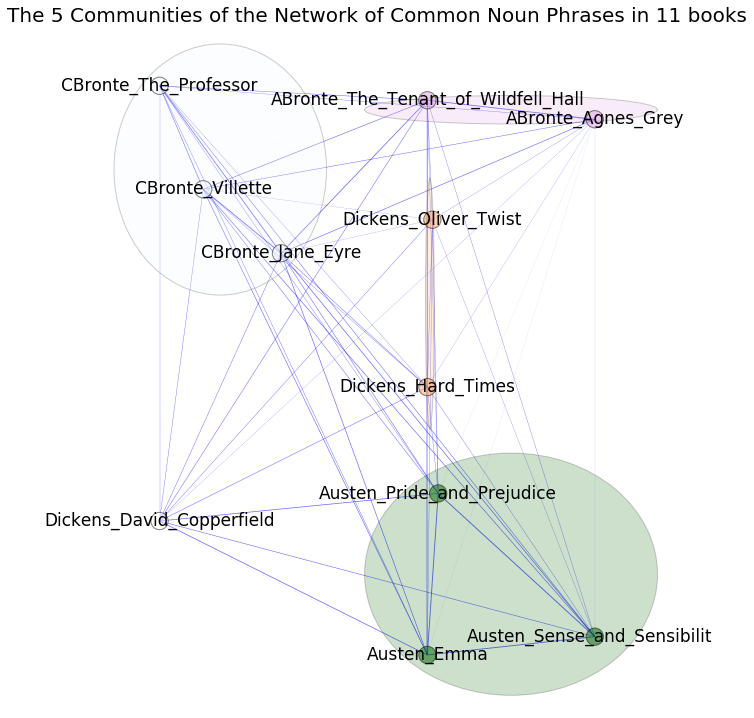

In [8]:
sstt="Network of Common Noun Phrases "#\n(Sentences colored in subjectivity)"# %titlename
part,nodper=tool.print_communities(G,sstt)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=0.6
vcc={}
sstta="The %s Communities of the Network of Common Noun Phrases in %i books" %(max(part.values())+1,len(titlenames))#sstt)

tool.draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=17,valpha=0.5)

## Adding Extra Books in the Collection

In [19]:
filenames=['VarLiteratureBooksCorpora/austen-brontë/Austen_Emma.txt',
           'VarLiteratureBooksCorpora/austen-brontë/Austen_Pride.txt',
           'VarLiteratureBooksCorpora/austen-brontë/Austen_Sense.txt',
           'VarLiteratureBooksCorpora/austen-brontë/CBronte_Jane.txt',
           'VarLiteratureBooksCorpora/austen-brontë/CBronte_Professor.txt',
           'VarLiteratureBooksCorpora/austen-brontë/CBronte_Villette.txt',
           'VarLiteratureBooksCorpora/british-fiction-corpus/ABronte_Agnes.txt',
           'VarLiteratureBooksCorpora/british-fiction-corpus/ABronte_Tenant.txt',#]
          'VarLiteratureBooksCorpora/british-fiction-corpus/Dickens_Oliver_Twist.txt',
           'VarLiteratureBooksCorpora/british-fiction-corpus/Dickens_David.txt',
           'VarLiteratureBooksCorpora/british-fiction-corpus/Dickens_Hard.txt',
          'VarLiteratureBooksCorpora/X/u.txt',#],
#             'VarLiteratureBooksCorpora/X/x1.txt',
#            'VarLiteratureBooksCorpora/X/x2.txt',
          'VarLiteratureBooksCorpora/X/De.txt']
# filenames = ['/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/Austen_Emma.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/Austen_Pride.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/Austen_Sense.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/CBronte_Jane.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/CBronte_Professor.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/CBronte_Villette.txt']
# titlename = "Plato's Protagoras"
# titlenames=['Austen_Emma','Austen_Pride','Austen_Sense','CBronte_Jane','CBronte_Professor','CBronte_Villette']
titlenames=['Austen_Emma',
            'Austen_Pride_and_Prejudice',
            'Austen_Sense_and_Sensibility',
            'CBronte_Jane_Eyre',
            'CBronte_The_Professor',
            'CBronte_Villette',
            'Dickens_Oliver_Twist',
            'Dickens_David_Copperfield',
            'Dickens_Hard_Times',
            'ABronte_Agnes_Grey',
           'ABronte_The_Tenant_of_Wildfell_Hall',#]
            'U',
#             'X1',
#             'X2',
            'Y']
# e']
# filenames=['VarLiteratureBooksCorpora/austen-brontë/Austen_Emma.txt','VarLiteratureBooksCorpora/austen-brontë/Austen_Pride.txt','VarLiteratureBooksCorpora/austen-brontë/Austen_Sense.txt','VarLiteratureBooksCorpora/austen-brontë/CBronte_Jane.txt','VarLiteratureBooksCorpora/austen-brontë/CBronte_Professor.txt','VarLiteratureBooksCorpora/austen-brontë/CBronte_Villette.txt']

# from textblob.np_extractors import ConllExtractor
# extractor = ConllExtractor()
        

# titlenames=['Austen_Emma','Austen_Pride','Austen_Sense','CBronte_Jane','CBronte_Professor','CBronte_Villette']
blobs={}
for ii,filename in enumerate(filenames):
    f = codecs.open(filename, "r", encoding="utf-8").readlines()

    num_lines = 0
    num_words = 0
    num_chars = 0
    for line in f:
        words = line.split()
        num_lines += 1
        num_words += len(words)
        num_chars += len(line)
    print "%s has number of words = %i (and number of characters = %i)" %(titlenames[ii],num_words,num_chars)
#     blobs[ii] = TextBlob(f,np_extractor=extractor)
    blobs[ii] = TextBlob("\n".join(f))

Austen_Emma has number of words = 157836 (and number of characters = 894304)
Austen_Pride_and_Prejudice has number of words = 121472 (and number of characters = 683754)
Austen_Sense_and_Sensibility has number of words = 118573 (and number of characters = 678691)
CBronte_Jane_Eyre has number of words = 189029 (and number of characters = 1026320)
CBronte_The_Professor has number of words = 87983 (and number of characters = 506144)
CBronte_Villette has number of words = 192124 (and number of characters = 1104704)
Dickens_Oliver_Twist has number of words = 67755 (and number of characters = 378987)
Dickens_David_Copperfield has number of words = 169364 (and number of characters = 930593)
Dickens_Hard_Times has number of words = 157981 (and number of characters = 897635)
ABronte_Agnes_Grey has number of words = 359374 (and number of characters = 1960784)
ABronte_The_Tenant_of_Wildfell_Hall has number of words = 104189 (and number of characters = 572724)
U has number of words = 214302 (and nu

In [20]:
moccurdic={}
for ii,blob in blobs.items():
    all_sents=blob.sentences
    occurdic=Counter()
    for sen in all_sents:
        dd=sen.dict
        for np in dd['noun_phrases']:
            occurdic[np]+=1

    moccurdic[ii]=Counter(occurdic)

In [21]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
# stop=set()
ses=None
for ii,vv in moccurdic.items():
#     print ii,set(vv).intersection(stop).intersection(ses)
    if ses==None:
        
        ses=set(vv.keys())-stop
    else:
        ses=ses.intersection(set(vv.keys())-stop)
print 'The %i books have the following %i common noun phrases:' %(len(titlenames),len(ses))
columnss=['noun_phrase']
for tit in list(titlenames):
    columnss.append(tit)

dfnamesa=pd.DataFrame()
dff=[]
for sss in ses:
    
    dfd={'noun_phrase':sss}
    for ii,vv in moccurdic.items():
        dfd[titlenames[ii]]=vv[sss]
    dff.append(dfd)
dfnamesa=pd.DataFrame(dff)
# ses
dfnamesa=dfnamesa[columnss]
dfnamesa

The 13 books have the following 14 common noun phrases:


,noun_phrase,Austen_Emma,Austen_Pride_and_Prejudice,Austen_Sense_and_Sensibility,CBronte_Jane_Eyre,CBronte_The_Professor,CBronte_Villette,Dickens_Oliver_Twist,Dickens_David_Copperfield,Dickens_Hard_Times,ABronte_Agnes_Grey,ABronte_The_Tenant_of_Wildfell_Hall,U,Y
0,think,3,1,1,3,1,3,2,4,3,7,4,1,1
1,oh,176,90,67,100,23,64,10,26,45,104,11,64,17
2,whether,2,1,1,4,1,8,4,4,6,19,5,8,1
3,god,7,3,9,106,27,59,41,74,30,44,10,79,14
4,never,11,6,5,16,2,17,6,5,7,9,10,21,4
5,well,84,36,48,92,33,52,10,28,8,32,13,57,7
6,ca n't,1,2,8,11,2,20,20,47,40,70,28,23,3
7,own heart,7,1,7,2,4,2,2,7,1,8,1,1,1
8,own way,7,4,3,4,2,12,4,6,2,9,1,8,1
9,london,45,54,35,20,9,13,9,33,44,94,8,7,2


In [22]:
ses=None
excluded=['have','was','shall',"ca n't",'think']
# excluded=[]
for ii,vv in moccurdic.items():
    vv=set(vv.keys()) -(set(excluded))
    if ses==None:
        ses=set(vv)
    else:
        ses=ses.intersection(set(vv))
#     print ii,len(ses)
print 'The %i books have the following %i common noun phrases:' %(len(titlenames),len(ses))
print 'The %i books have the following %i common noun phrases:' %(len(titlenames),len(ses))
columnss=['noun_phrase']
for tit in list(titlenames):
    columnss.append(tit)

dfnames=pd.DataFrame()
dff=[]
for sss in ses:
    
    dfd={'noun_phrase':sss}
#     dff.append({})
#     print sss,
    for ii,vv in moccurdic.items():
        dfd[titlenames[ii]]=vv[sss]*1./sum(moccurdic[ii].values())
    dff.append(dfd)
#         print ii,'=>',vv[sss],
#     print 
dfnames=pd.DataFrame(dff)
# ses
dfnames=dfnames[columnss]
dfnames

The 13 books have the following 15 common noun phrases:
The 13 books have the following 15 common noun phrases:


,noun_phrase,Austen_Emma,Austen_Pride_and_Prejudice,Austen_Sense_and_Sensibility,CBronte_Jane_Eyre,CBronte_The_Professor,CBronte_Villette,Dickens_Oliver_Twist,Dickens_David_Copperfield,Dickens_Hard_Times,ABronte_Agnes_Grey,ABronte_The_Tenant_of_Wildfell_Hall,U,Y
0,who,0.001177,0.001153,0.001124,0.003554,0.001357,0.002714,0.000792,0.000479,0.000809,0.000505,0.000769,0.002261,0.003659
1,oh,0.015933,0.011533,0.008369,0.008668,0.003902,0.004825,0.002639,0.003112,0.003643,0.004381,0.001409,0.003911,0.006911
2,whether,0.000181,0.000128,0.000125,0.000347,0.000170,0.000603,0.001055,0.000479,0.000486,0.000800,0.000640,0.000489,0.000407
3,god,0.000634,0.000384,0.001124,0.009188,0.004580,0.004448,0.010818,0.008857,0.002428,0.001853,0.001281,0.004828,0.005691
4,never,0.000996,0.000769,0.000625,0.001387,0.000339,0.001282,0.001583,0.000598,0.000567,0.000379,0.001281,0.001283,0.001626
5,well,0.007605,0.004613,0.005996,0.007974,0.005598,0.003920,0.002639,0.003351,0.000648,0.001348,0.001665,0.003483,0.002846
6,own heart,0.000634,0.000128,0.000874,0.000173,0.000679,0.000151,0.000528,0.000838,0.000081,0.000337,0.000128,0.000061,0.000407
7,christmas,0.000815,0.000769,0.000250,0.000607,0.000170,0.000302,0.001847,0.000598,0.000081,0.000084,0.000256,0.000122,0.020732
8,will,0.000905,0.001025,0.001124,0.002774,0.001866,0.001583,0.001847,0.001676,0.000405,0.001053,0.001153,0.002567,0.002439
9,own way,0.000634,0.000513,0.000375,0.000347,0.000339,0.000905,0.001055,0.000718,0.000162,0.000379,0.000128,0.000489,0.000407


In [23]:
dfnamescor=dfnames.corr()
dfnamescor

,Austen_Emma,Austen_Pride_and_Prejudice,Austen_Sense_and_Sensibility,CBronte_Jane_Eyre,CBronte_The_Professor,CBronte_Villette,Dickens_Oliver_Twist,Dickens_David_Copperfield,Dickens_Hard_Times,ABronte_Agnes_Grey,ABronte_The_Tenant_of_Wildfell_Hall,U,Y
Austen_Emma,1.000000,0.891046,0.870435,0.611661,0.569877,0.585639,0.043669,0.249389,0.638987,0.729127,0.536724,0.439108,0.088434
Austen_Pride_and_Prejudice,0.891046,1.000000,0.941761,0.512173,0.493617,0.505139,-0.013538,0.212412,0.722006,0.733164,0.396294,0.418622,0.051343
Austen_Sense_and_Sensibility,0.870435,0.941761,1.000000,0.662253,0.699028,0.618140,0.063867,0.284420,0.623050,0.578297,0.444213,0.554501,0.032559
CBronte_Jane_Eyre,0.611661,0.512173,0.662253,1.000000,0.946442,0.931821,0.683635,0.730285,0.569676,0.412064,0.594448,0.844910,0.153310
CBronte_The_Professor,0.569877,0.493617,0.699028,0.946442,1.000000,0.815526,0.604174,0.725179,0.491333,0.353979,0.620455,0.819849,0.068066
CBronte_Villette,0.585639,0.505139,0.618140,0.931821,0.815526,1.000000,0.589552,0.559230,0.497968,0.408069,0.424984,0.727872,0.080313
Dickens_Oliver_Twist,0.043669,-0.013538,0.063867,0.683635,0.604174,0.589552,1.000000,0.916615,0.477350,0.241889,0.344125,0.525095,0.203522
Dickens_David_Copperfield,0.249389,0.212412,0.284420,0.730285,0.725179,0.559230,0.916615,1.000000,0.668682,0.468059,0.556236,0.596565,0.076602
Dickens_Hard_Times,0.638987,0.722006,0.623050,0.569676,0.491333,0.497968,0.477350,0.668682,1.000000,0.818657,0.500084,0.383888,0.017208
ABronte_Agnes_Grey,0.729127,0.733164,0.578297,0.412064,0.353979,0.408069,0.241889,0.468059,0.818657,1.000000,0.546919,0.265446,-0.121478


In [24]:
G=nx.Graph()
ddd=dfnamescor.to_dict(orient='index')
# print ddd
for k,v in ddd.items():
    for kk,vv in v.items():
        G.add_edge(k,kk,weight=vv)
import community as comms
part = comms.best_partition(G)
# print part
npart={}
for k,v in part.items():
    if v not in npart:
        npart[v]=[]
    npart[v].append(k)
npart

{0: ['Austen_Pride_and_Prejudice',
  'ABronte_Agnes_Grey',
  'Austen_Sense_and_Sensibility',
  'Dickens_Hard_Times',
  'Austen_Emma'],
 1: ['Dickens_David_Copperfield', 'Dickens_Oliver_Twist'],
 2: ['CBronte_Villette', 'CBronte_Jane_Eyre', 'U', 'CBronte_The_Professor'],
 3: ['Y'],
 4: ['ABronte_The_Tenant_of_Wildfell_Hall']}

Number of communities of Network of Common Noun Phrases  = 5
Community partition of Network of Common Noun Phrases :
[['Austen_Pride_and_Prejudice', 'ABronte_Agnes_Grey', 'Austen_Sense_and_Sensibility', 'Dickens_Hard_Times', 'Austen_Emma'], ['Dickens_David_Copperfield', 'Dickens_Oliver_Twist'], ['CBronte_Villette', 'CBronte_Jane_Eyre', 'U', 'CBronte_The_Professor'], ['Y'], ['ABronte_The_Tenant_of_Wildfell_Hall']]
Community modularity of Network of Common Noun Phrases  = 0.2128


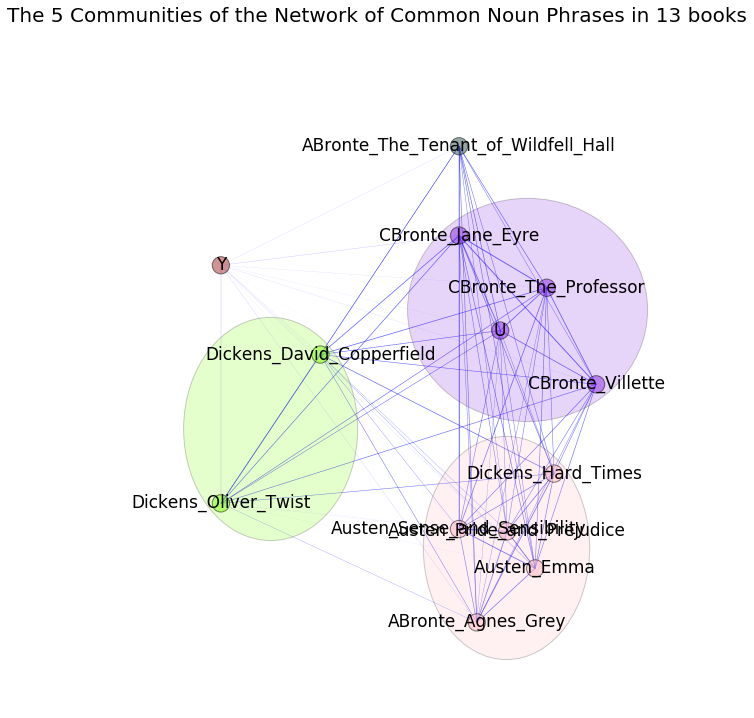

In [25]:
sstt="Network of Common Noun Phrases "#\n(Sentences colored in subjectivity)"# %titlename
part,nodper=tool.print_communities(G,sstt)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=0.6
vcc={}
sstta="The %s Communities of the Network of Common Noun Phrases in %i books" %(max(part.values())+1,len(titlenames))#sstt)

tool.draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=17,valpha=0.5)